# Problem Statement:

A new car manufacturing company wants to launch cars in different categories and would like to have an idea about the price 
of cars based on cars specifications (in terms of various characteristics) available in market.

Task: Develop a suitable model which can help company to predict car prices.

Following points must be included in your analysis:

• EDA analysis (Exploratory Data Analysis):

Need to present complete data review with suitable charts/graphs

Data processing steps

Generic steps and process followed for given dataset-

For example, if one of the missing value treatments has been applied then we would need information on other methods 
as well with justification as to why this method has been applied instead of others. This would be applicable for all 
steps (like multicollinearity, outlier, variable selection etc.) you followed in data processing/preparation.

Need justification if any Variable transformation (Bucketing, dummy variable creation) has been applied.

Assumption applied, if any.

Model Building:

Reason for selecting this model (what are the criteria you considered to finalize

your model, also provide generic ranges of considered criteria.

Considered model selection criteria, also give information on criteria you have not considered but can be considered.

Results of the model using Test and Validation sample.

# Submission Details:

1. You are supposed to share python code along with above mentioned details.

2. You are supposed to share test dataset along with predicted prices based upon the model built using training dataset.

3. Perform the Lazzo & Ridge Optimization model.

4. Build the various ensemble model and observe the performance.

5. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company.

# 1. Description:

This data set consists of three types of entities:

a. the specification of an auto in terms of various characteristics,

b. Its assigned insurance risk rating:

This corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned 
a risk factor symbol associated with its price. Then, if it is more risky (or less). this symbol is adjusted by moving 
it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky. 
-3 that it is probably pretty safe

c. its normalized losses in use as compared to other cars:

This factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos 
within a particular size classification (two-door small, station wagons, sports/speciality, etc.), and represents the 
average loss per car per year.

2. Missing values are denoted by "NA".

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('cars_train.xlsx')
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [5]:
df.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [6]:
df.columns

Index(['symboling', 'normalized.losses', 'make', 'fuel.type', 'aspiration',
       'num.of.doors', 'body.style', 'drive.wheels', 'engine.location',
       'wheel.base', 'length', 'width', 'height', 'curb.weight', 'engine.type',
       'num.of.cylinders', 'engine.size', 'fuel.system', 'bore', 'stroke',
       'compression.ratio', 'horsepower', 'peak.rpm', 'city.mpg',
       'highway.mpg', 'Car_Price'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace('.', '_')

C:\Users\punee\AppData\Local\Temp\ipykernel_11580\2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [8]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'Car_Price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized_losses  132 non-null    float64
 2   make               162 non-null    object 
 3   fuel_type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num_of_doors       151 non-null    object 
 6   body_style         162 non-null    object 
 7   drive_wheels       162 non-null    object 
 8   engine_location    160 non-null    object 
 9   wheel_base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb_weight        162 non-null    int64  
 14  engine_type        162 non-null    object 
 15  num_of_cylinders   160 non-null    object 
 16  engine_size        162 non

In [10]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,Car_Price
count,162.000000,132.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,159.000000,159.000000,162.000000,158.000000,158.000000,162.000000,162.000000,159.000000
mean,0.907407,123.060606,98.354321,173.595062,65.843210,53.537654,2561.932099,128.160494,3.341698,3.239434,10.008704,106.000000,5116.455696,25.123457,30.679012,13182.094340
std,1.298855,36.144696,6.049384,12.339100,2.022325,2.346770,524.474870,41.684844,0.274566,0.356446,3.735804,41.489773,501.952971,6.604878,6.879309,7746.121309
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.425000,64.125000,52.000000,2151.000000,98.000000,3.150000,3.075000,8.700000,72.250000,4800.000000,19.000000,25.000000,7603.000000
50%,1.000000,116.500000,96.500000,172.400000,65.450000,53.700000,2419.500000,120.000000,3.330000,3.270000,9.000000,95.000000,5100.000000,24.000000,30.000000,10795.000000
75%,2.000000,150.000000,101.200000,181.650000,66.575000,55.500000,2975.750000,146.000000,3.605000,3.460000,9.400000,121.000000,5500.000000,30.000000,34.000000,16594.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [11]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
Car_Price            float64
dtype: object

In [12]:
df.shape

(162, 26)

In [16]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

for column in df.columns:
    #if column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
print(df.head())



   symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0          3                 31     8          1           0             1   
1          3                 29    10          1           0             0   
2          5                 37     8          1           0             1   
3          5                 47    11          1           0             2   
4          2                  6     5          1           0             0   

   body_style  drive_wheels  engine_location  wheel_base  ...  engine_size  \
0           2             1                0          23  ...           16   
1           3             1                0          16  ...           16   
2           2             2                0          11  ...            1   
3           2             2                0           4  ...           33   
4           3             1                0          17  ...           11   

   fuel_system  bore  stroke  compression_ratio  horsepower  p

In [17]:
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
Car_Price            0
dtype: int64

In [18]:
df['Car_Price'].unique()

array([ 72,  48,  93, 113,  89,  36,  65, 127,  84, 119, 144,  91,   6,
        44,  30, 102,  51,  49,   2,  11, 100,   3,  96,  64,  26,  71,
       111, 134,  92,  86,  53,  15, 140,  18,  99,   5, 106, 117,  61,
        55,   7,  21,   4, 121,  50,  69,   8, 112,  35,  39,  29,  33,
       122, 129,  54, 105,   9,  45, 137,  59,  79,  82, 118,  77,  22,
        31, 141, 138,  76,  63,  46,  37,  19,  70,  28,  56,  10,  95,
       101,  78, 120, 104, 110,  98, 131, 136,  12, 143,  73, 124,  20,
        88,  32,  17, 115,  68, 107,  62,  41,  40,  13,  74, 116, 114,
        43,  85,  23,  58, 103,  14,  81,   0,  57,  47,  60,  66,  34,
        25,  87,  38,  75,  97, 125,  52, 133, 142,  80, 139,  67, 132,
       135,  94,  16,  27, 109,  90,  24,  83, 130,   1, 108, 123, 128,
        42, 126], dtype=int64)

<Axes: ylabel='count'>

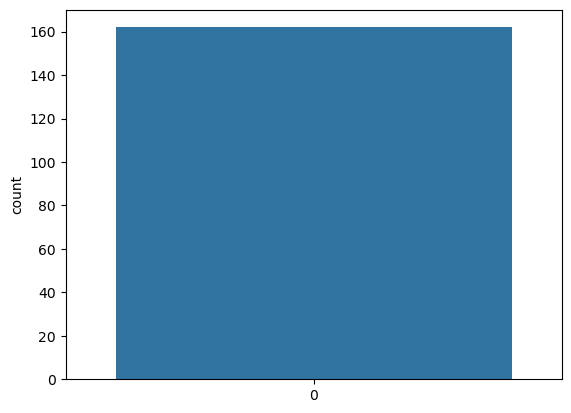

In [19]:
sns.countplot(df['Car_Price'])

<Axes: >

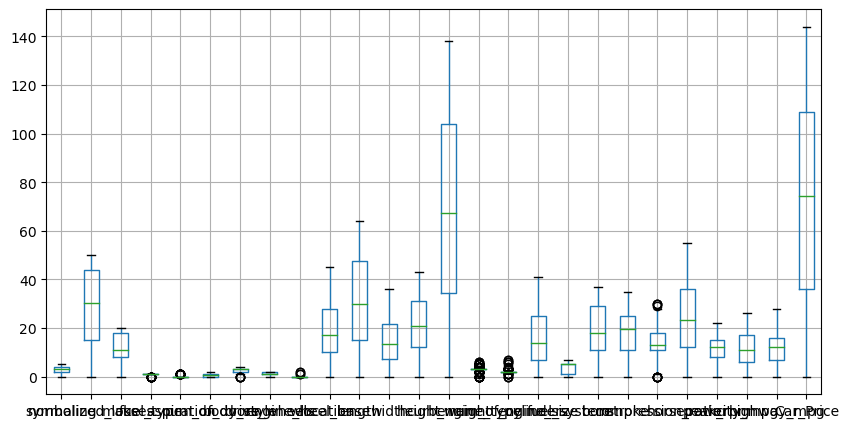

In [21]:
df.boxplot(figsize=(10,5))

In [22]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'Car_Price'],
      dtype='object')

In [23]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (162, 25)

Y shape:	 (162, 1)


In [24]:
#Spliting the data between test and training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=4)

In [25]:
#xtrain,xtest,ytrain, ytest=train_test_split(x,y, test_size=0.2, random_state=4)
print('*************Training Data Shape***************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t' ,ytrain.shape)
print()
print('**************Testing Data Shape****************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data (y-Outcome) Shape:\t',ytest.shape)

*************Training Data Shape***************

Training data-X- Shape:	 (129, 25)

Training data-y- Shape:	 (129, 1)

**************Testing Data Shape****************

Testing data(x-Input) Shape:	 (33, 25)

Testing data (y-Outcome) Shape:	 (33, 1)


In [27]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg*100, '%')
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 57.3545164154803 %

MSE-linear Regression:	 777.5646181309013

RMSE linear Regression:	 27.884845671635002


# Lasso regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = lasso_model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
rmse=np.sqrt(mean_squared_error(ytest, y_pred))
Variance_score=explained_variance_score(ytest, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

Mean Squared Error: 777.2130004031205
R-squared (R2) Score: 57.373800868101284 %
root-Mean Squared Error: 27.878540141175264
Variance_score: 58.00871855434225 %


In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

Ridge_model = Ridge(alpha=0.01)
Ridge_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = Ridge_model.predict(xtest)

print("Training score: ", Ridge_model.score(xtrain, ytrain)*100,"%")
print()
print("Training score: ", Ridge_model.score(xtest, ytest)*100,"%")
print()
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
rmse=np.sqrt(mean_squared_error(ytest, y_pred))
Variance_score=explained_variance_score(ytest, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")


Training score:  92.32235166672739 %

Training score:  57.35573363528922 %

Mean Squared Error: 777.5424242905142
R-squared (R2) Score: 57.35573363528922 %
root-Mean Squared Error: 27.88444771356453
Variance_score: 57.99061772356401 %


In [38]:
print(ytest, y_pred)

[[ 44]
 [139]
 [ 26]
 [117]
 [ 61]
 [ 36]
 [ 91]
 [ 49]
 [  4]
 [ 50]
 [123]
 [111]
 [104]
 [134]
 [ 96]
 [118]
 [ 64]
 [ 90]
 [ 82]
 [ 36]
 [ 27]
 [  2]
 [144]
 [124]
 [144]
 [137]
 [ 65]
 [ 57]
 [ 93]
 [140]
 [ 80]
 [ 89]
 [ 17]] [[ 47.9413054 ]
 [138.05922141]
 [ 30.83879118]
 [113.32525797]
 [ 98.62564067]
 [ 32.44425488]
 [ 88.48536775]
 [ 51.92129384]
 [ 15.21931706]
 [ 26.41579376]
 [120.6836916 ]
 [ 81.00358487]
 [111.92974876]
 [143.31333679]
 [121.83102667]
 [ 96.40739524]
 [ 81.6450772 ]
 [ 91.63446294]
 [ 49.36759239]
 [ 32.44425488]
 [ 34.43984856]
 [ 10.47876206]
 [ 15.00098781]
 [ 98.01580464]
 [161.75255499]
 [122.99374166]
 [ 94.36457689]
 [ 55.40302098]
 [ 80.02801685]
 [164.4160471 ]
 [ 69.26350905]
 [ 77.17580092]
 [ 24.85337428]]


In [56]:
df = pd.read_excel('cars_test.xlsx')
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,NaN
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,NaN
2,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
3,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
4,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,NaN


In [57]:
#df.drop(columns=['Car_Price'], inplace=True)

In [58]:
df.isna().sum()

symboling             0
normalized.losses    12
make                  0
fuel.type             0
aspiration            0
num.of.doors          5
body.style            0
drive.wheels          0
engine.location       4
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      1
engine.size           0
fuel.system           0
bore                  1
stroke                1
compression.ratio     0
horsepower            0
peak.rpm              0
city.mpg              0
highway.mpg           0
Car_Price            52
dtype: int64

In [59]:
df.dropna(subset=['Car_Price'], inplace=True)

In [60]:
df.isna().sum()

symboling            0.0
normalized.losses    0.0
make                 0.0
fuel.type            0.0
aspiration           0.0
num.of.doors         0.0
body.style           0.0
drive.wheels         0.0
engine.location      0.0
wheel.base           0.0
length               0.0
width                0.0
height               0.0
curb.weight          0.0
engine.type          0.0
num.of.cylinders     0.0
engine.size          0.0
fuel.system          0.0
bore                 0.0
stroke               0.0
compression.ratio    0.0
horsepower           0.0
peak.rpm             0.0
city.mpg             0.0
highway.mpg          0.0
Car_Price            0.0
dtype: float64

In [64]:
xtest.shape

(33, 25)

In [65]:
xtrain.shape

(129, 25)

In [61]:
ytest.shape

(33, 1)

In [62]:
y_pred.shape

(33, 1)

In [68]:
df['Car_Price'] = y_pred

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [76]:
df.columns

Index(['symboling', 'normalized.losses', 'make', 'fuel.type', 'aspiration',
       'num.of.doors', 'body.style', 'drive.wheels', 'engine.location',
       'wheel.base', 'length', 'width', 'height', 'curb.weight', 'engine.type',
       'num.of.cylinders', 'engine.size', 'fuel.system', 'bore', 'stroke',
       'compression.ratio', 'horsepower', 'peak.rpm', 'city.mpg',
       'highway.mpg', 'Car_Price'],
      dtype='object')

In [80]:


car_test_df = pd.read_excel('cars_test.xlsx')

y_pred = list(y_pred)
car_pred_df = pd.DataFrame({'car_price_pred': y_pred})

df['Car_Price'] = car_pred_df['car_price_pred']

print(df.head())


   symboling  normalized.losses make fuel.type aspiration num.of.doors  \
0        NaN                NaN  NaN       NaN        NaN          NaN   
1        NaN                NaN  NaN       NaN        NaN          NaN   
2        NaN                NaN  NaN       NaN        NaN          NaN   
3        NaN                NaN  NaN       NaN        NaN          NaN   
4        NaN                NaN  NaN       NaN        NaN          NaN   

  body.style drive.wheels engine.location  wheel.base  ...  engine.size  \
0        NaN          NaN             NaN         NaN  ...          NaN   
1        NaN          NaN             NaN         NaN  ...          NaN   
2        NaN          NaN             NaN         NaN  ...          NaN   
3        NaN          NaN             NaN         NaN  ...          NaN   
4        NaN          NaN             NaN         NaN  ...          NaN   

   fuel.system  bore  stroke compression.ratio horsepower  peak.rpm city.mpg  \
0          NaN   NaN    